# **Data Augmentation To address Overfitting In Flower Classification CNN**

**In this notebook we will build a CNN to classify flower images. we will also see how our model overfits and how overfitting can be addressed using data augmentation.**

**Import library**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Load flowers dataset**

fet_file : Downloads a file from a URL if it not already in the cache. includes some aurgment such as origin,cache_dir and untar.

In [2]:
datat_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=datat_url,  cache_dir='.', untar=True)

data_dir


228813984/228813984 [==============================] - 36s 0us/step


'./datasets/flower_photos'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

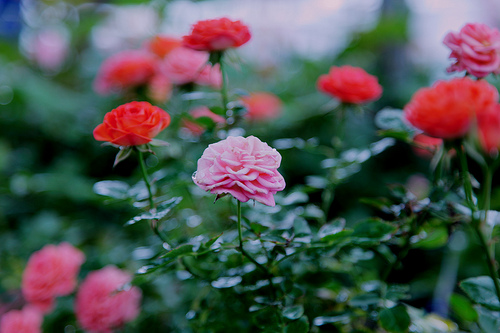

In [7]:
PIL.Image.open(str(roses[1]))


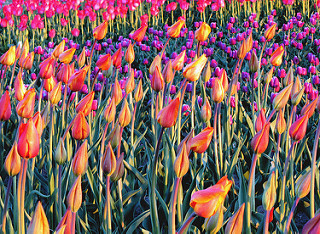

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

**Read flowers images from disk into numpy array using opencv**

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [14]:
img.shape

(243, 500, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
img.shape

(333, 500, 3)

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
print (X)
print ("---------------------------------------------------------------------------")
print (X)

[[[[  2   0   2]
   [ 10   5   1]
   [ 89  85  97]
   ...
   [244 245 243]
   [244 245 243]
   [244 245 243]]

  [[ 14  33  73]
   [  6   1   2]
   [ 92  90 105]
   ...
   [243 244 242]
   [244 245 243]
   [243 244 242]]

  [[122 176 224]
   [ 10   1   2]
   [ 72  80  84]
   ...
   [244 245 243]
   [244 245 243]
   [244 245 243]]

  ...

  [[147 109  85]
   [145 109  85]
   [144 108  84]
   ...
   [155 122  96]
   [152 121  95]
   [149 118  93]]

  [[148 114  91]
   [154 120  96]
   [146 112  88]
   ...
   [155 125  98]
   [153 121  95]
   [152 122  93]]

  [[153 119  96]
   [151 117  93]
   [152 117  94]
   ...
   [154 124  97]
   [153 121  95]
   [153 123  94]]]


 [[[139  46  12]
   [129  29   3]
   [116  25   0]
   ...
   [200 165 175]
   [202 168 175]
   [203 168 175]]

  [[138  47  20]
   [128  36   6]
   [120  32   0]
   ...
   [198 163 173]
   [199 165 172]
   [200 167 173]]

  [[134  51  14]
   [123  41   4]
   [123  41   4]
   ...
   [197 161 171]
   [196 161 170]
   [198 164

**Train test split**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Preprocessing: scale images**

Dividing all the values by 255 will convert it to range from 0 to 1

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Build convolutional neural network and train it**

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

2023-07-19 16:26:42.266373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
86/86 [==============================] - 34s 386ms/step - loss: 1.4781 - accuracy: 0.3863
Epoch 2/30
86/86 [==============================] - 34s 396ms/step - loss: 1.0861 - accuracy: 0.5603
Epoch 3/30
86/86 [==============================] - 42s 490ms/step - loss: 0.9060 - accuracy: 0.6552
Epoch 4/30
86/86 [==============================] - 38s 439ms/step - loss: 0.7313 - accuracy: 0.7198
Epoch 5/30
86/86 [==============================] - 36s 419ms/step - loss: 0.5297 - accuracy: 0.8118
Epoch 6/30
86/86 [==============================] - 36s 418ms/step - loss: 0.3212 - accuracy: 0.8848
Epoch 7/30
86/86 [==============================] - 32s 367ms/step - loss: 0.1811 - accuracy: 0.9430
Epoch 8/30
86/86 [==============================] - 31s 358ms/step - loss: 0.0935 - accuracy: 0.9742
Epoch 9/30
86/86 [==============================] - 34s 396ms/step - loss: 0.0549 - accuracy: 0.9844
Epoch 10/30
86/86 [==============================] - 36s 415ms/step - loss: 0.1422 - accura

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 99ms/step - loss: 3.2333 - accuracy: 0.6416


[3.233332633972168, 0.64161217212677]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 3s 105ms/step


array([[ 13.109335  ,  16.699747  ,   6.6852603 , -15.822632  ,
          0.95412576],
       [ 23.872875  ,   8.700472  ,  -5.1590185 ,   0.7634492 ,
          5.632963  ],
       [  0.6094368 , -15.275734  ,  13.468987  ,   1.3235312 ,
        -21.088787  ],
       ...,
       [-12.137008  ,  -4.2727904 ,  -0.9947326 ,   7.239998  ,
         -5.30743   ],
       [ 11.361461  ,   0.7907014 ,  -0.15617241,  -5.4284472 ,
          9.452159  ],
       [-17.14391   , -22.057446  ,  -3.9565365 ,  26.773975  ,
         -0.07756916]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

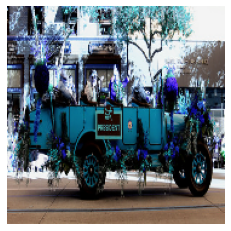

In [29]:
plt.axis('off')
plt.imshow(X[0])